<a href="https://colab.research.google.com/github/Scorpzgca/Data-Science-/blob/main/Final%20Project%20OpenWeather%20API_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Final Project using API, Data Sets

#Step 1 Sign Up for OpenWeather API

!pip install requests pandas matplotlib

In [ ]:
#Install Required Libraries

# Import libraries

import requests
import pandas as pd
import matplotlib.pyplot as plt

Final Project by Joseph Opoku

In [ ]:
#Step 3 API contrutct Request

# Import libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Define your OpenWeather API key
API_KEY = "f822a1237dd31a0a06230568290599c8"  # Replace with your actual API key!

# Choose a city to get weather for
city_name = "London"

# Construct request URL
url = f"https://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={API_KEY}&units=metric"

# Make API request

response = requests.get(url)

# Check the response status code
print(f"Response status code: {response.status_code}")

# Get the JSON data
data = response.json()

# Print the response
print(data)

Response status code: 200
{'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 19.73, 'feels_like': 19.74, 'temp_min': 18.9, 'temp_max': 20.51, 'pressure': 1016, 'humidity': 76, 'sea_level': 1016, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 3.09, 'deg': 230}, 'clouds': {'all': 100}, 'dt': 1753517413, 'sys': {'type': 2, 'id': 2075535, 'country': 'GB', 'sunrise': 1753503325, 'sunset': 1753559901}, 'timezone': 3600, 'id': 2643743, 'name': 'London', 'cod': 200}


In [ ]:
# Step 4 Extract Useful Information

if "main" in data:
    city = data["name"]
    temp = data["main"]["temp"]
    humidity = data["main"]["humidity"]
    weather = data["weather"][0]["description"]

    print(f"City: {city}\nTemperature: {temp}°C\nHumidity: {humidity}%\nWeather: {weather}")
else:
    print("Error fetching weather data.")

City: London
Temperature: 19.13°C
Humidity: 76%
Weather: broken clouds


In [ ]:
# Step 5 Store Data in DataFrame

data_dict = {
    "city": [city],
    "Temperature (°C)": [temp],
    "Humidity (%)": [humidity],
    "Weather Description": [weather]
}

weather_df = pd.DataFrame(data_dict)
print(weather_df)

     city  Temperature (°C)  Humidity (%) Weather Description
0  London             19.13            76       broken clouds


In [ ]:
weather_df.to_csv("weather_data.csv", index=False)
print("Data saved to weather_data.csv")

Data saved to weather_data.csv


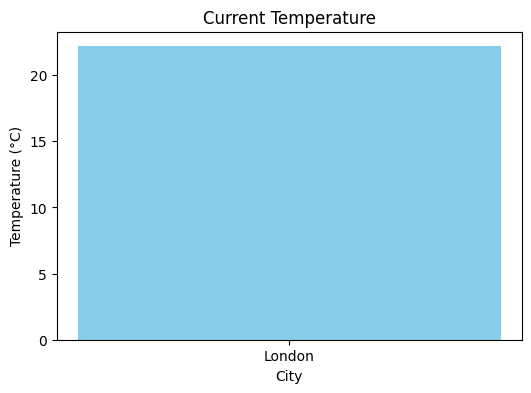

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(weather_df["City"], weather_df["Temperature (°C)"], color='skyblue')
plt.xlabel("City")
plt.ylabel("Temperature (°C)")
plt.title("Current Temperature")
plt.show()

In [ ]:
cities = ["London", "New York", "Paris", "Tokyo", "Sydney"]
weather_data = []

for city in cities:
    url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={API_KEY}&units=metric"
    response = requests.get(url)
    data = response.json()

    if "main" in data:
        weather_data.append({
            "City": city,
            "Temperature (°C)": data["main"]["temp"],
            "Humidity (%)": data["main"]["humidity"],
            "Weather Description": data["weather"][0]["description"]
        })

# Convert to DataFrame
multi_city_df = pd.DataFrame(weather_data)
print(multi_city_df)

       City  Temperature (°C)  Humidity (%) Weather Description
0    London             22.18            55     overcast clouds
1  New York             26.51            56       broken clouds
2     Paris             19.99            75       broken clouds
3     Tokyo             28.25            76          few clouds
4    Sydney              9.77            64           clear sky


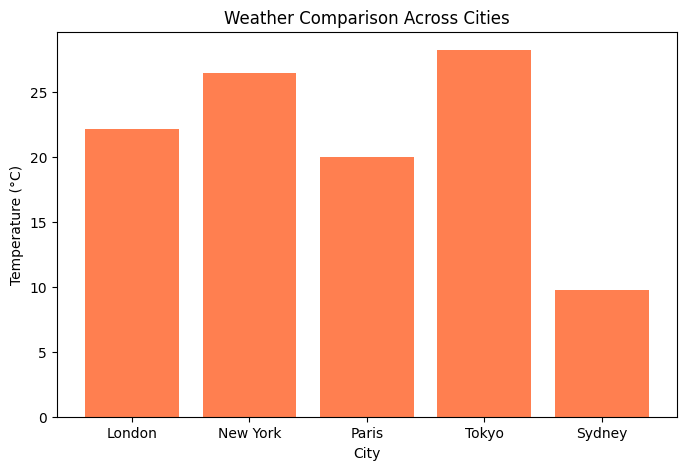

In [ ]:
#Step 7: Visualizing Weather Trends

plt.figure(figsize=(8,5))
plt.bar(multi_city_df["City"], multi_city_df["Temperature (°C)"], color='coral')
plt.xlabel("City")
plt.ylabel("Temperature (°C)")
plt.title("Weather Comparison Across Cities")
plt.show()

In [ ]:

# The hottest and coldest cities
hottest_city = weather_df.loc[weather_df['Temperature (°C)'].idxmax()]
coldest_city = weather_df.loc[weather_df['Temperature (°C)'].idxmin()]

print("Temperature Analysis:")
print(f"Hottest city: {hottest_city['city']} ({hottest_city['Temperature (°C)']}°C)")
print(f"Coldest city: {coldest_city['city']} ({coldest_city['Temperature (°C)']}°C)")
print(f"Temperature difference: {hottest_city['Temperature (°C)'] - coldest_city['Temperature (°C)']}°C")

Temperature Analysis:
Hottest city: London (19.13°C)
Coldest city: London (19.13°C)
Temperature difference: 0.0°C


In [ ]:
# Find humidity patterns
most_humid = weather_df.loc[weather_df['Humidity (%)'].idxmax()]
least_humid = weather_df.loc[weather_df['Humidity (%)'].idxmin()]

print("Humidity Analysis:")
print(f"Most humid: {most_humid['city']}, ({most_humid['Humidity (%)']}%)")
print(f"Least humid: {least_humid['city']}, ({least_humid['Humidity (%)']}%)")
print(f"Average humidity: {weather_df['Humidity (%)'].mean():.1f}%")

Humidity Analysis:
Most humid: London, (76%)
Least humid: London, (76%)
Average humidity: 76.0%


In [ ]:
# Look at weather descriptions
# 🔎 Can you spot the error in the code below?

print("Weather Conditions Summary:")
weather_counts = weather_df['Weather Description'].value_counts()
for condition, count in weather_counts.items():
    print(f"   {condition.title()}: {count} cities")

Weather Conditions Summary:
   Overcast Clouds: 1 cities


In [ ]:
# Troubleshooting cell for debugging

print(weather_df)

     City  Temperature (°C)  Humidity (%) Weather Description
0  London             22.18            55     overcast clouds


In [ ]:
if "main" in data:
    city = data["name"]
    temp = data["main"]["temp"]
    humidity = data["main"]["humidity"]
    weather = data["weather"][0]["description"]

    print(f"City: {city}\nTemperature: {temp}°C\nHumidity: {humidity}%\nWeather: {weather}")
else:
    print("Error fetching weather data.")

City: Sydney
Temperature: 9.77°C
Humidity: 64%
Weather: clear sky


In [ ]:
import requests
import pandas as pd

# Define your OpenWeather API key
API_KEY = "f822a1237dd31a0a06230568290599c8"  # Replace with your actual API key!

cities = ["London", "New York", "Paris", "Tokyo", "Sydney"]
weather_data = []

for city in cities:
    url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={API_KEY}&units=metric"
    response = requests.get(url)
    data = response.json()

    if "main" in data:
        weather_data.append({
            "City": city,
            "Temperature (°C)": data["main"]["temp"],
            "Humidity (%)": data["main"]["humidity"],
            "Weather Description": data["weather"][0]["description"]
        })

# Convert to DataFrame
weather_df = pd.DataFrame(weather_data)
print(weather_df)

       City  Temperature (°C)  Humidity (%) Weather Description
0    London             23.41            49    scattered clouds
1  New York             27.59            68           clear sky
2     Paris             22.04            52       broken clouds
3     Tokyo             29.70            72       broken clouds
4    Sydney             11.89            63    scattered clouds


In [ ]:
weather_df.to_csv("weather_data.csv", index=False)
print("Data saved to weather_data.csv")

Data saved to weather_data.csv
